# CODE (Lecture 9) - 14 December / 2021 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
from sympy import Matrix
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



### Integrators

In [2]:
def rk4s(f,h,x,**kwargs): # RK4 single iteration
    k1 = h*f(x,**kwargs)
    k2 = h*f(x+0.5*k1,**kwargs)
    k3 = h*f(x+0.5*k2,**kwargs)
    k4 = h*f(x+k3,**kwargs)
    x += (k1+2*k2+2*k3+k4)/6
    return x 

def rk4(f, y0, t,**kwargs): #RK4 integrator
    n = len(t)
    m = len(y0)
    y = np.zeros((n,m))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(y[i], t[i], **kwargs)
        k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h, **kwargs)
        k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h, **kwargs)
        k4 = h * f(y[i] + k3, t[i+1], **kwargs)
        y[i+1] = y[i] + (k1 + 2.0 * ( k2 + k3 ) + k4)/6.0
    return y

### Lorenz System

In [3]:
def Lorenz(y, t=0, sigma=10, rho=28, beta=2.6667):
    dy = np.zeros_like(y)
    dy[0] = sigma * (y[1]-y[0])
    dy[1] = y[0] *(rho-y[2])- y[1]
    dy[2] = y[0]*y[1] - beta*y[2]
    return dy

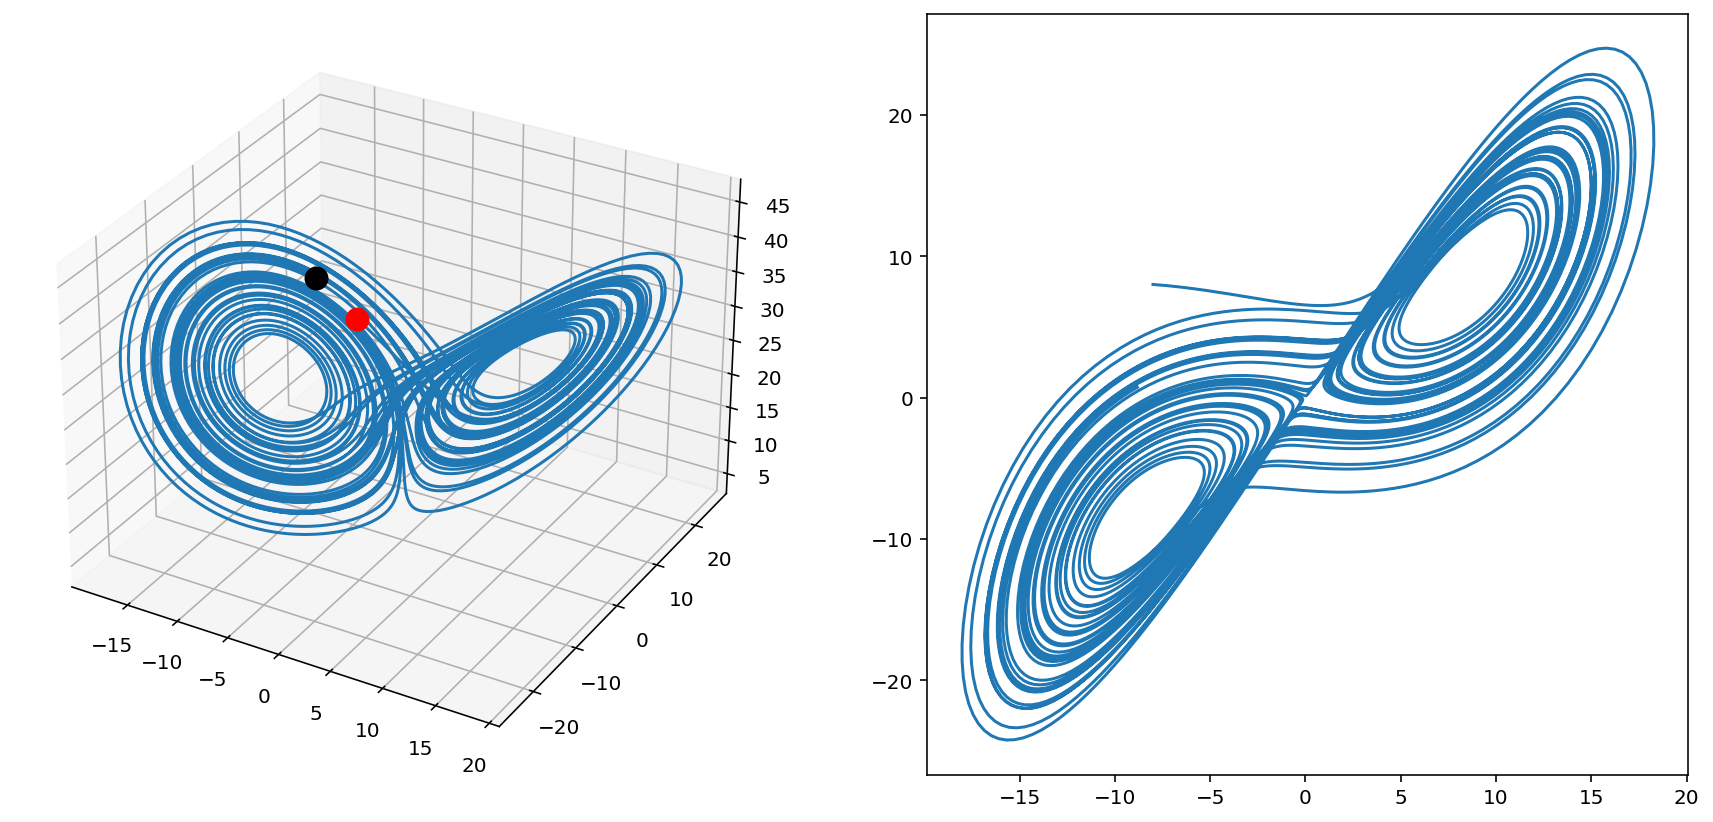

In [4]:
t = np.arange(0,50, 0.005)
x0 = np.array([-8.,8.,27])
#x0 = np.array([0.,0.,-27]) # Stable Space of Origin
X = rk4(Lorenz, x0, t)
plt.figure(figsize=(15,7))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[0,0],X[0,1],X[0,2], c='r', s=120)
ax.plot(X[:,0],X[:,1],X[:,2])
ax.scatter(X[-1,0],X[-1,1],X[-1,2], c='k', s=120)
ax = plt.subplot(122)
plt.plot(X[:,0],X[:,1])
plt.show()

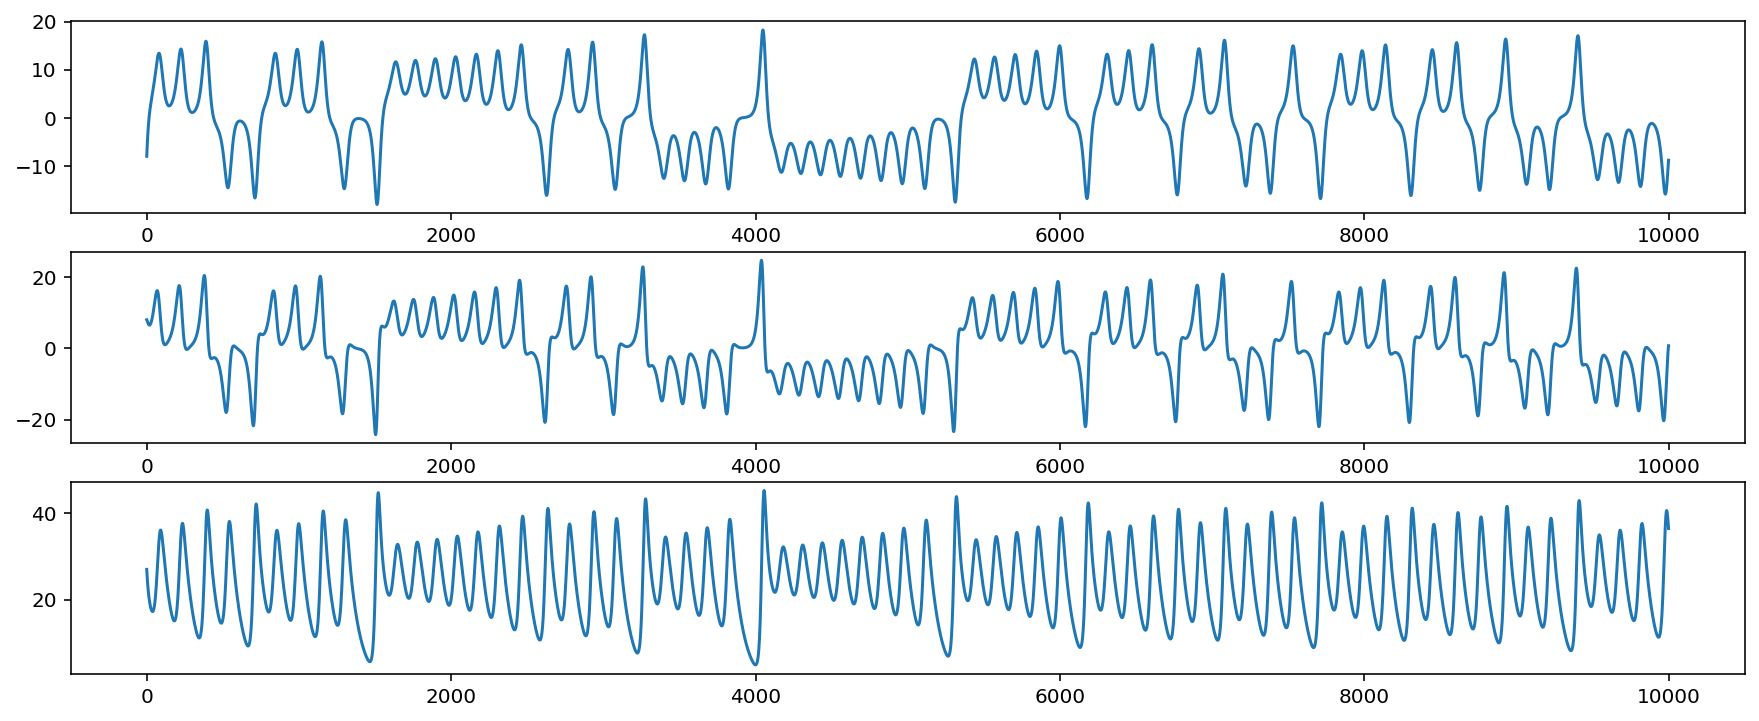

In [5]:
fig = plt.figure(figsize=(15,6))
plt.subplot(311); plt.plot(X[:,0])
plt.subplot(312); plt.plot(X[:,1])
plt.subplot(313); plt.plot(X[:,2])
plt.show()

### Divergence of trajectories

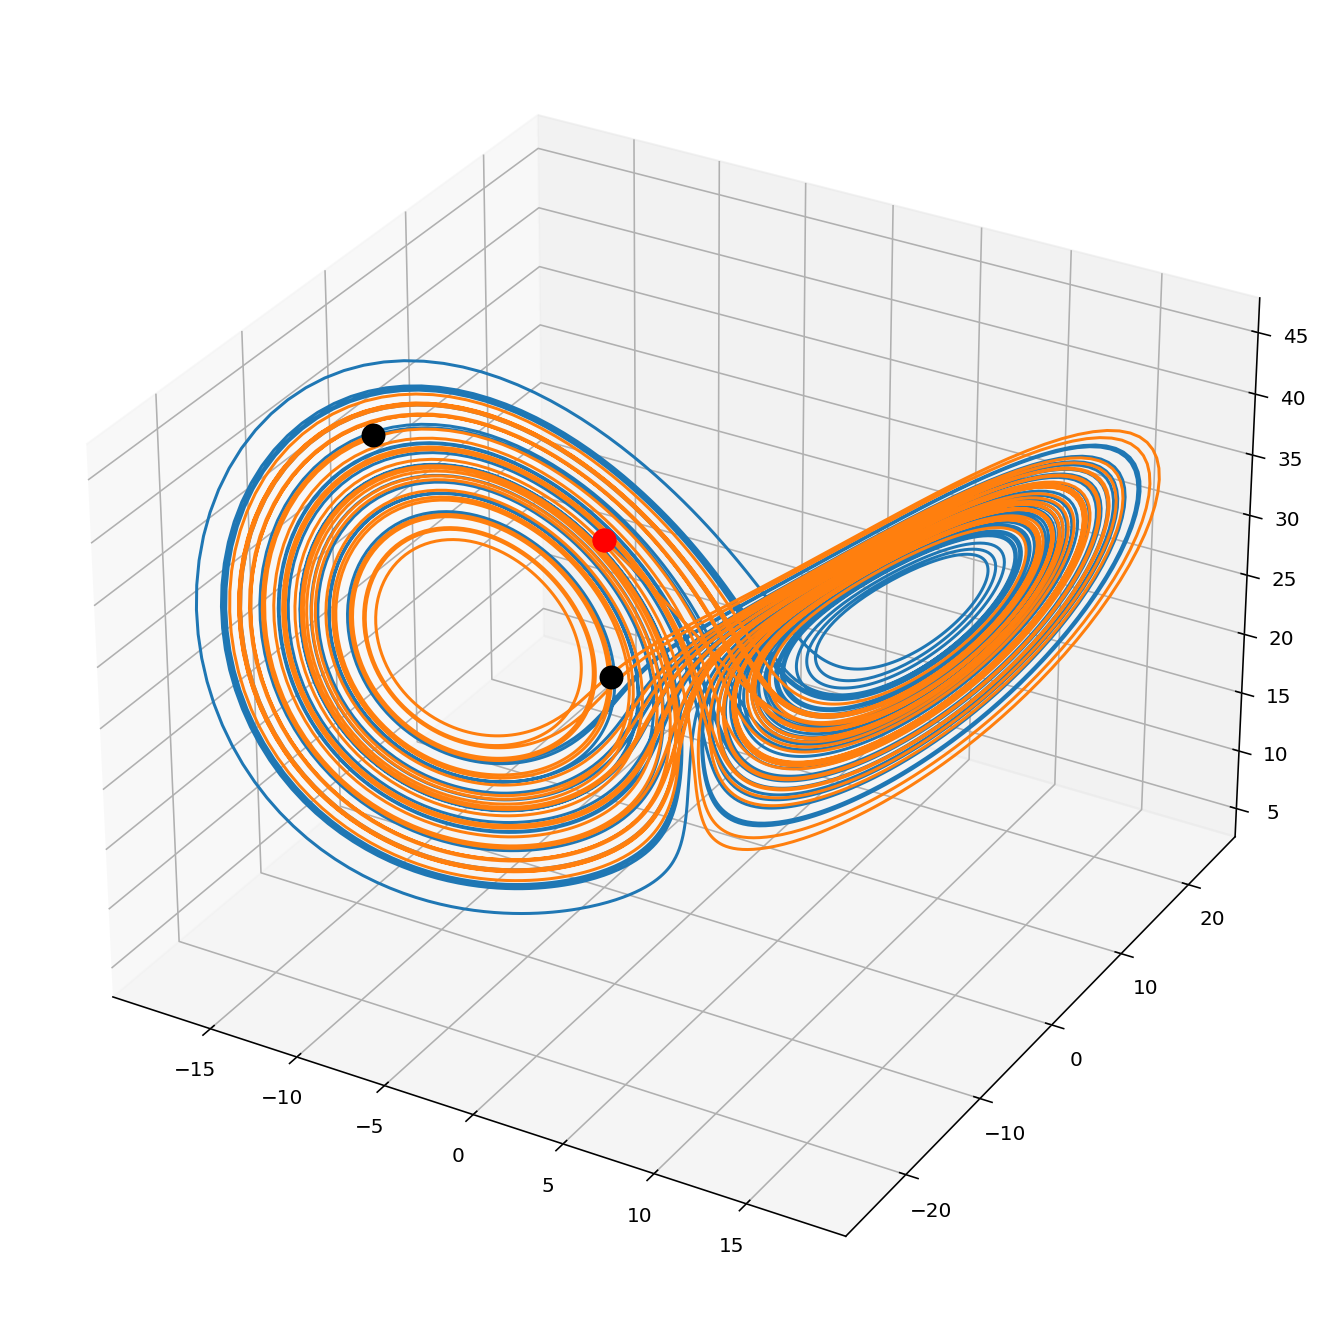

In [6]:
t = np.arange(0,40, 0.005)
x01 = np.array([-8.,7.001,27])
x02 = np.array([-8.,7.,27])
X1 = rk4(Lorenz, x01, t, sigma=10)
X2 = rk4(Lorenz, x02, t, sigma=10)

plt.figure(figsize=(12,12))
ax = plt.subplot(111, projection='3d')
ax.scatter(X1[0,0],X1[0,1],X1[0,2], c='r', s=120)
ax.plot(X1[:,0],X1[:,1],X1[:,2])
ax.scatter(X1[-1,0],X1[-1,1],X1[-1,2], c='k', s=120)
ax.scatter(X2[0,0],X2[0,1],X2[0,2], c='r', s=120)
ax.plot(X2[:,0],X2[:,1],X2[:,2])
ax.scatter(X2[-1,0],X2[-1,1],X2[-1,2], c='k', s=120)
plt.show()

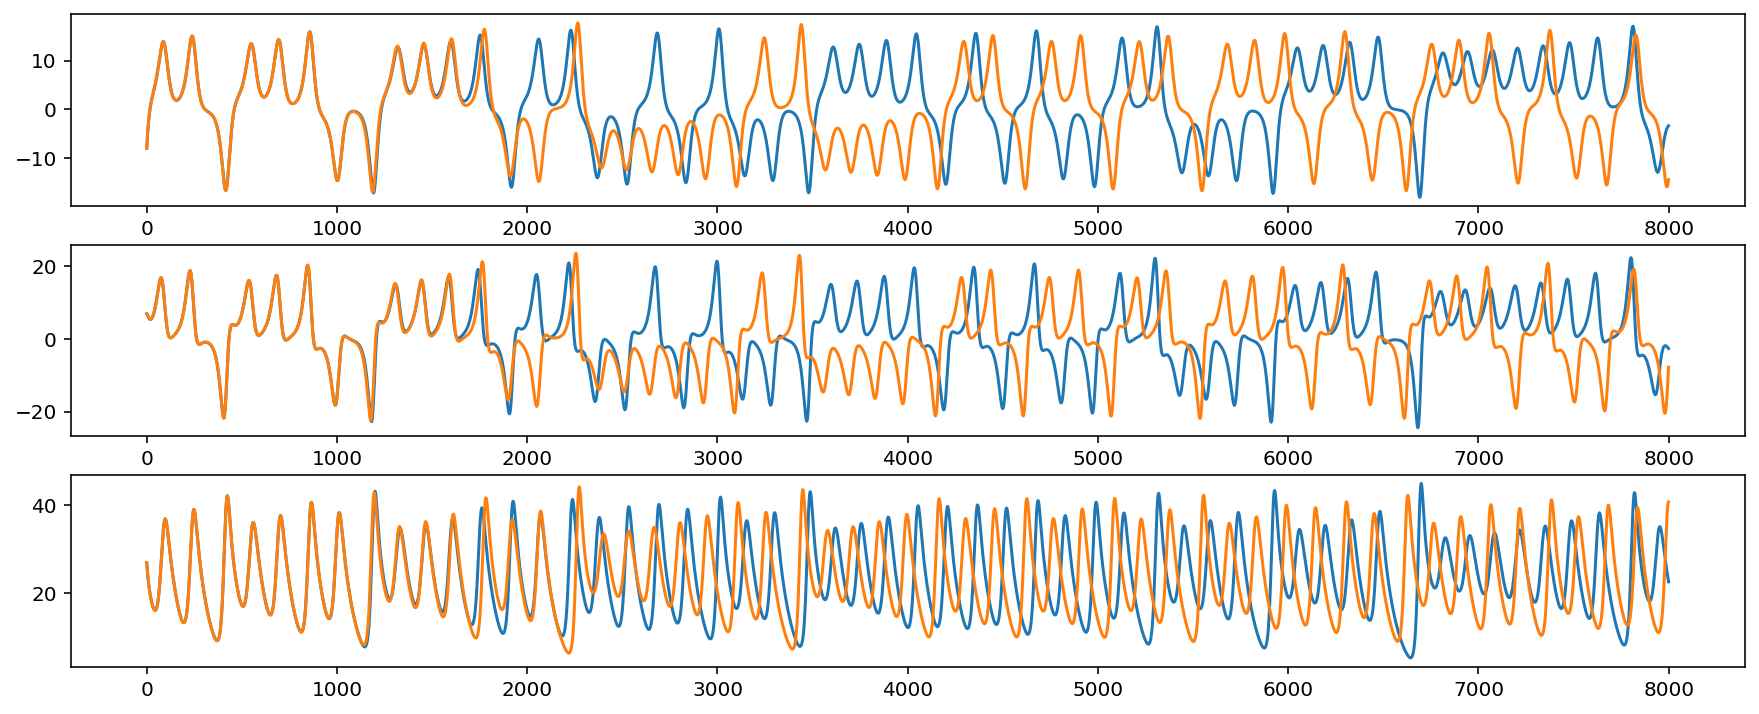

In [7]:
fig = plt.figure(figsize=(15,6))
plt.subplot(311); plt.plot(X1[:,0]);plt.plot(X2[:,0])
plt.subplot(312); plt.plot(X1[:,1]);plt.plot(X2[:,1])
plt.subplot(313); plt.plot(X1[:,2]);plt.plot(X2[:,2])
plt.show()

### Lyapunov Exponents

#### Saturation of distance in bounded space

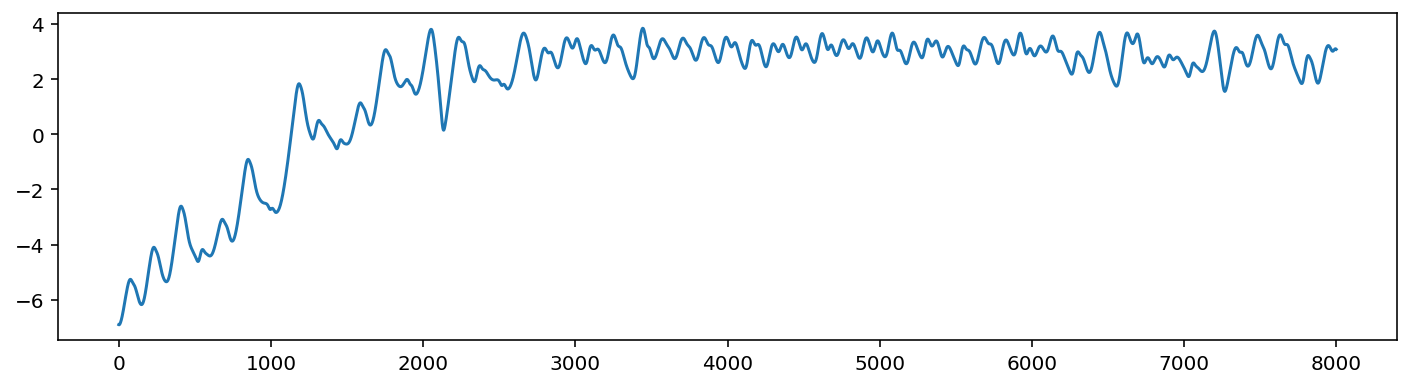

In [8]:
def Dist(x,y):
    D=0
    for k in range(len(x)):
        D += (x[k]-y[k])**2
    return D**(0.5)

Distance = np.zeros(len(t))
for k in range(len(t)): Distance[k] = Dist(X1[k],X2[k])

plt.figure(figsize=(12,3))
plt.plot(np.log(Distance))
plt.show()

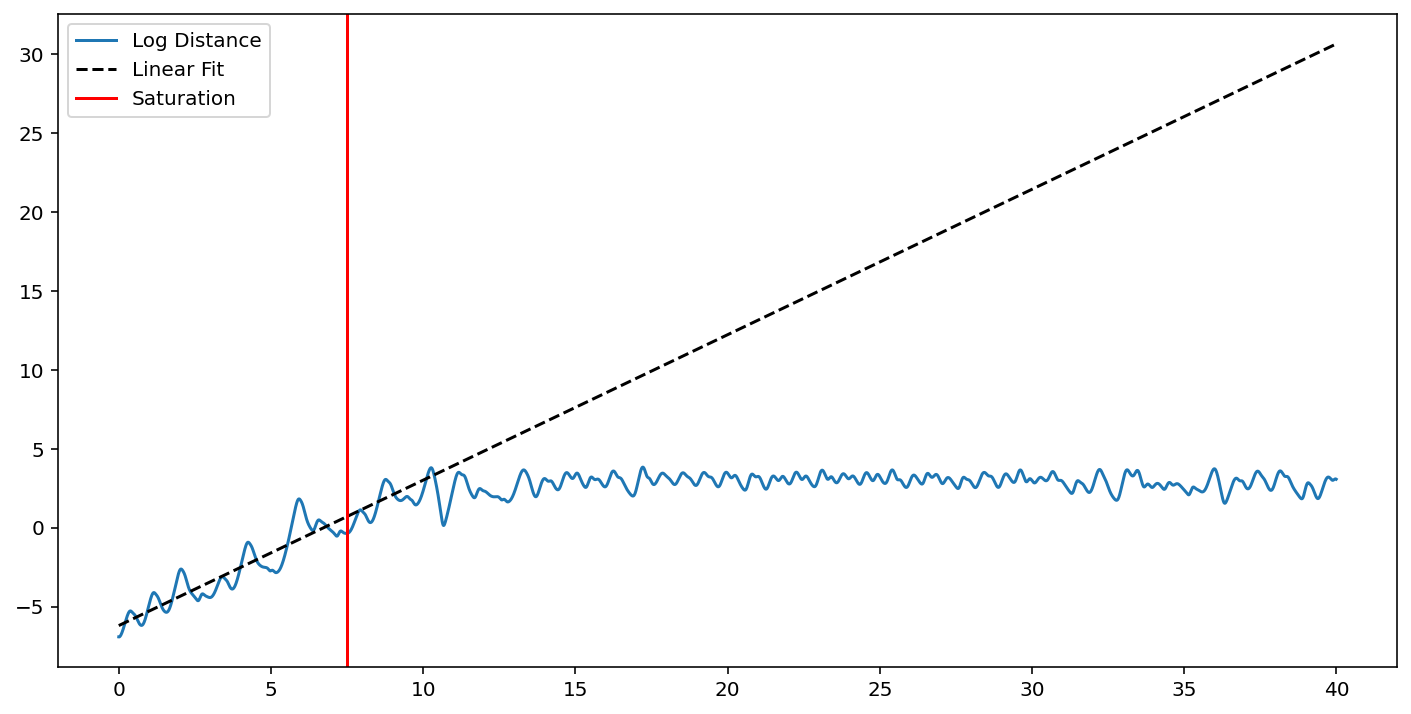

Max Lyapunov Exponent : 0.9214617916499829


In [9]:
sat = 1500
coef = np.polyfit(t[:sat], np.log(Distance[:sat]),1)
line = np.poly1d(coef)
plt.figure(figsize=(12,6))

plt.plot(t, np.log(Distance), label='Log Distance')
plt.plot(t, line(t), '--k', label='Linear Fit')
plt.axvline(t[sat], label='Saturation', c='r')
plt.legend()
plt.show()

print('Max Lyapunov Exponent :', coef[0])